

This notebook contains the work for Step 3 of the Data Science Method:

The Data Science Method

1.Problem Identification

2.Data Wrangling

         . Data Collection
         . Data Organization
         . Data Definition
         . Data Cleaning

3.Exploratory Data Analysis

   . Build data profile tables and plots

     - Outliers & Anomalies

   . Explore data relationships
   
   . Identification and creation of features</b>

1.Pre-processing and Training Data Development

       . Create dummy or indicator features for categorical variables
       . Standardize the magnitude of numeric features
       . Split into testing and training datasets
       . Apply scaler to the testing set

2.Modeling

       . Fit Models with Training Data Set
       . Review Model Outcomes — Iterate over additional models as needed.
       . Identify the Final Model
3.Documentation

       . Review the Results
       . Present and share your findings - storytelling
       . Finalize Code
       . Finalize Documentation



Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 473 frauds out of 283253 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import gridspec
from scipy.stats import chi2_contingency

Data Description

1.The datasets contains transactions made by credit cards in September 2013 by european cardholders. The transactions occur in two days.

2.Features V1, V2, ... V28 are the principal components obtained with PCA.

3.Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

4.The feature 'Amount' is the transaction Amount.

5.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
pd.set_option('display.max_rows', 1500)

Read and Explore the data set

In [3]:
# load the data saved from step 2
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Build data profile tables and plots

In [4]:
# Print out the summary stats table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Unblanced dataset

In [32]:
# information of all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

Observing from the above columns information of the credit card dataframe created we can observe that about 31 parameters are available for about 280000 credit card transactions. The data obtained in this dataset was as a result of Principle Component Analysis (PCA) for dimensionality reduction performed in order to protect the sensitive information prevalent in the original dataset. The Class column indicates 0 for valid transaction and 1 for fraudulent transaction.

Now I will be visualizing all the features from the dataset on graphs

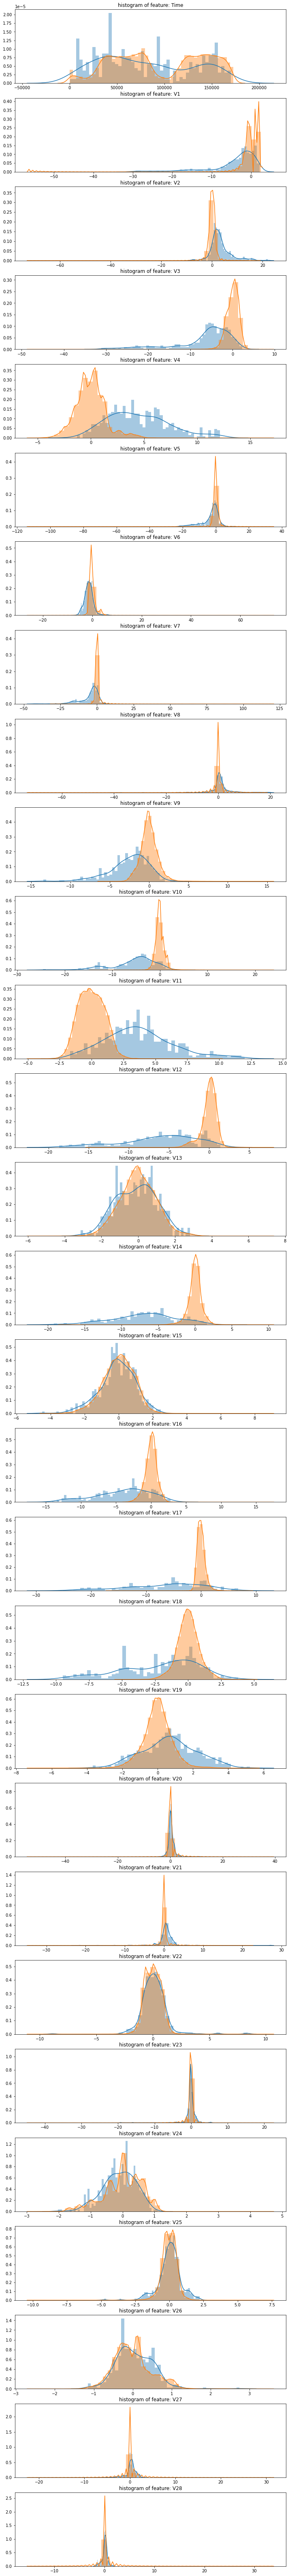

In [8]:
# distribution of anomalous features
features = df.iloc[:,0:29].columns
plt.figure(figsize=(12,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(df[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(df[c][df.Class == 1], bins=50)
 sns.distplot(df[c][df.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

Observing the histograms:

1.Most of the V parameters are found to be clustered around 0 with some V's showing fairly large outliers and some showing no outliers at all.

2.When it comes to the class feature, it can be seen that a very small minority of transactions are actually fraudulent which does makes sense. However, the actual number or fraction of fradulent transactions needs to be determined.


Let’s separate the Fraudulent cases from the valid ones and compare their occurrences in the dataset.

In [33]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


There is only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

Let's see how time compares across fraudulent and valid transactions.

In [40]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Valid")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Valid
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


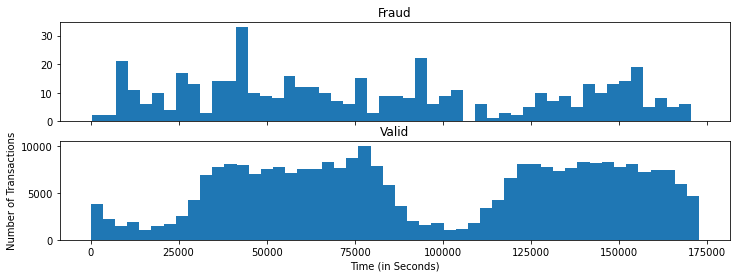

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Valid')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

There are significant peaks and lows in the time distribution indicating the huge difference between the number of transactions occuring during the day and night
The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while valid transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Let's see how amount compares across fraudulent and valid transactions.

In [38]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


The average Money transaction for the fraudulent ones are more.This makes this problem crucial to deal with.

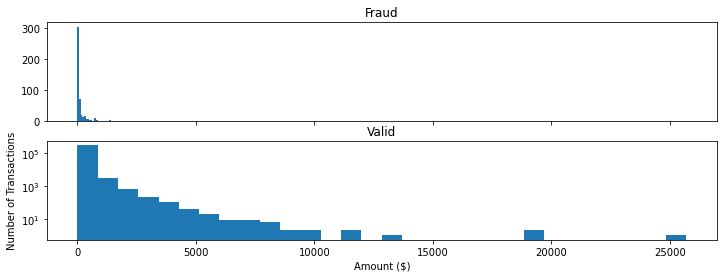

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Valid')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [42]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

Most transactions are small amounts, less than  100.Fraudulent transactions have a maximum value far less than valid transactions, 2,125.87 vs $25,691.16.

Let's compare Time with Amount 

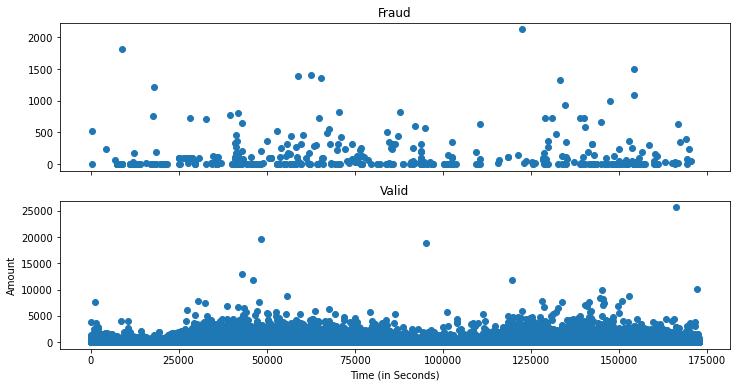

In [43]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Valid')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing too useful here. 





Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.



Plotting the Correlation Matrix

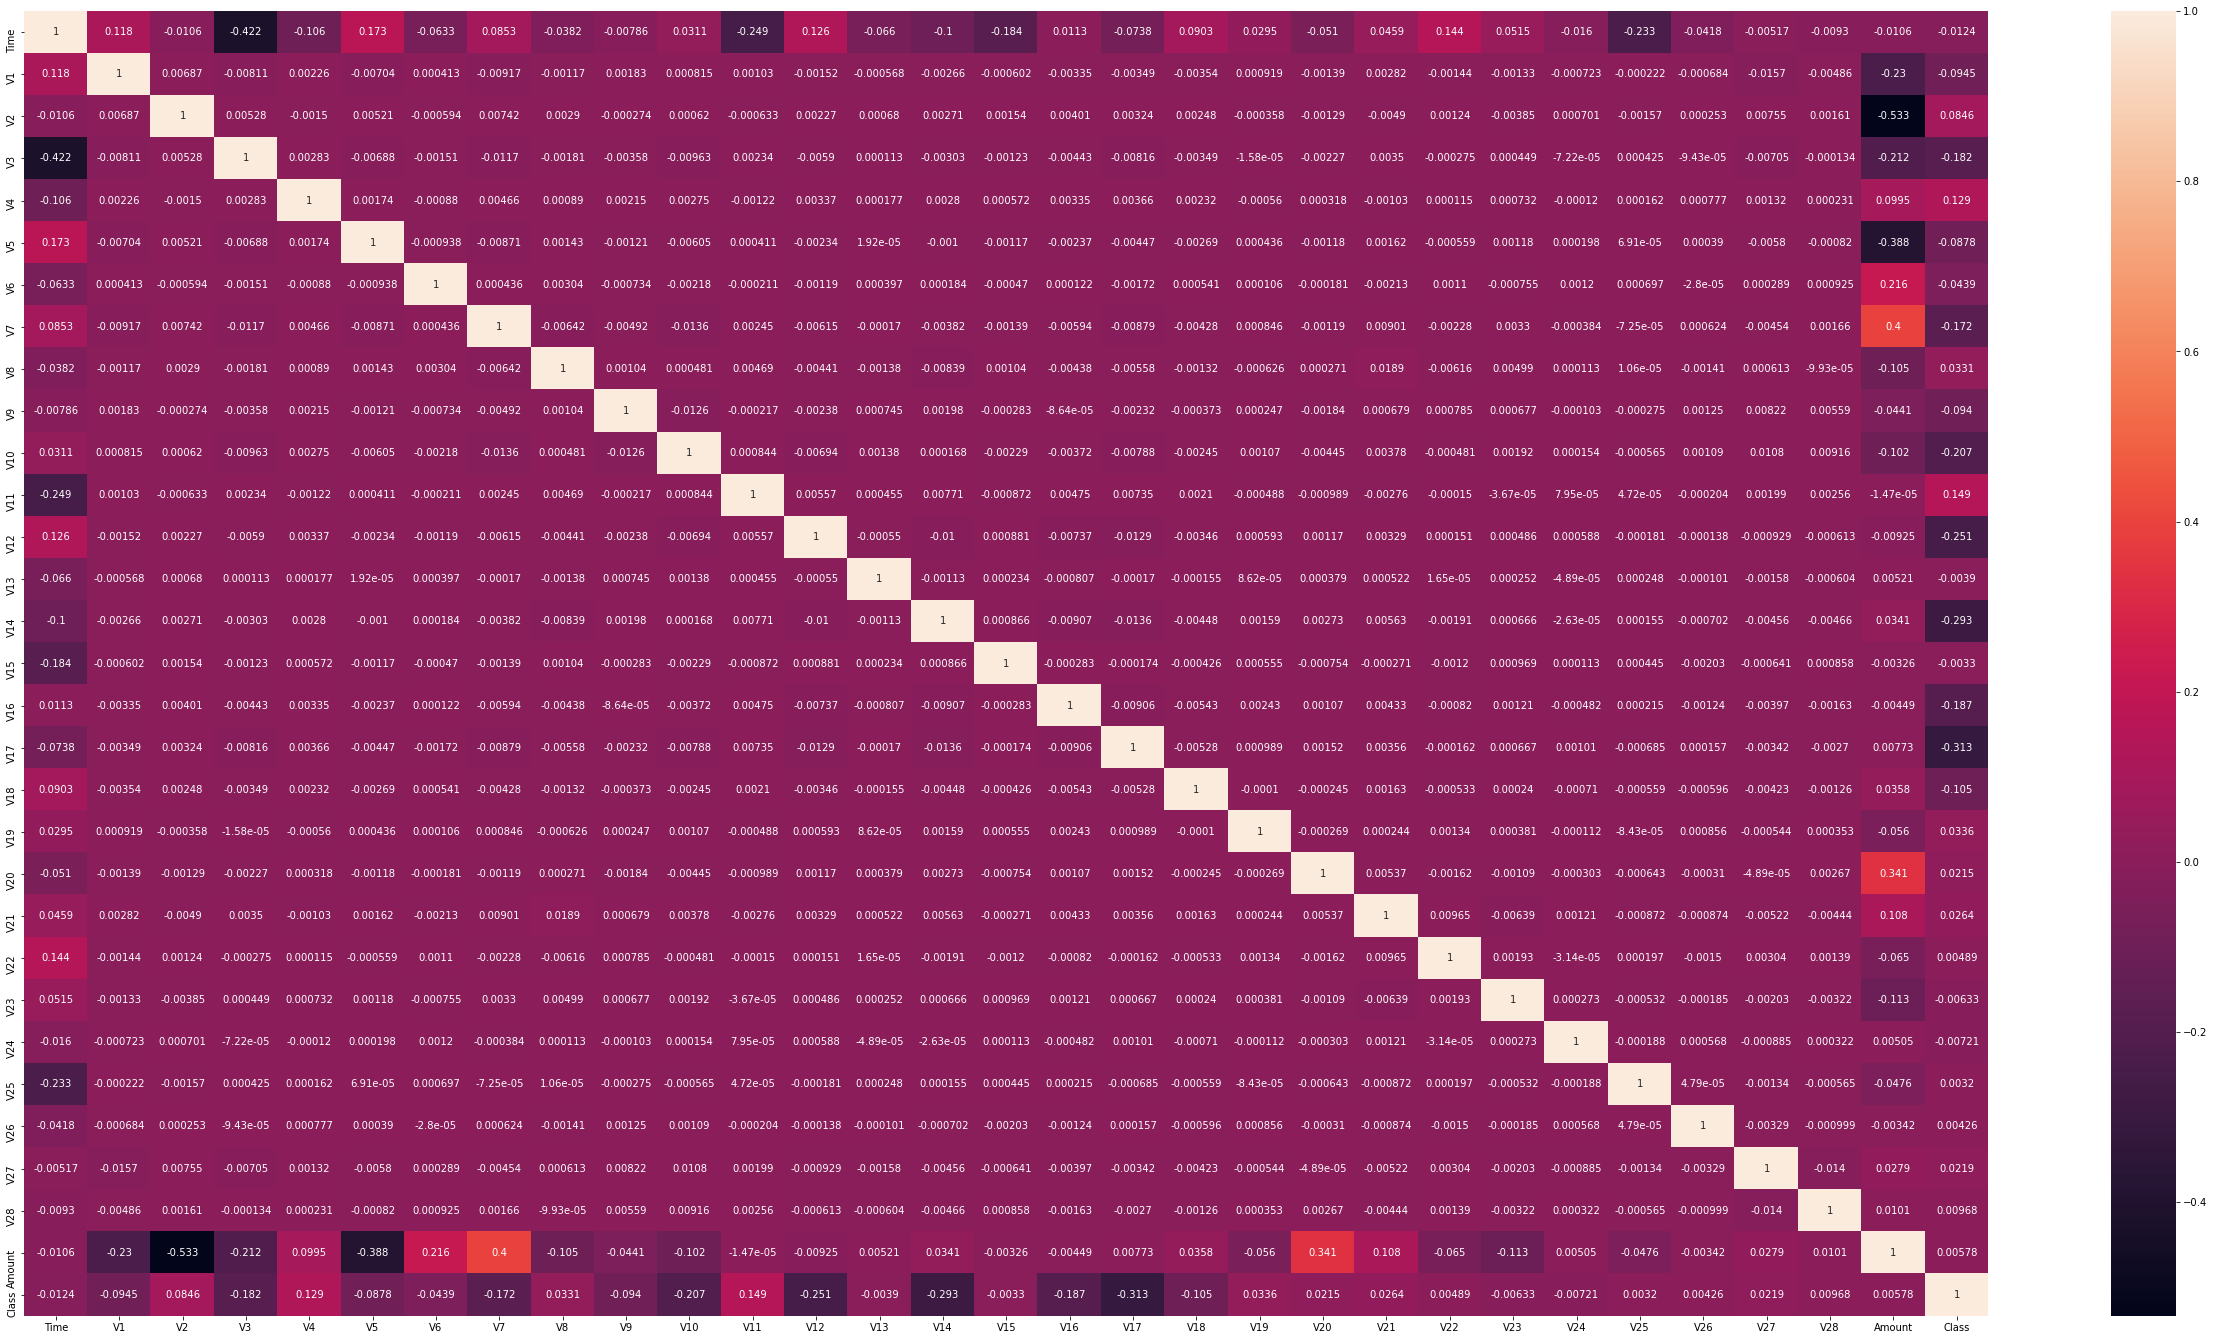

In [6]:
# calculate the correlation matrix
corr = df.corr()

plt.subplots(figsize=(44,24))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.


In [174]:
# save 
df.to_csv(r'C:\Users\arna_mora\Springboard\unit 7\creditcard.csv', index = False)